In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
# plt.style.available

In [2]:
car_data = pd.read_csv('./datasets/automobile_data_processed.csv')
car_data.sampleple(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
184,27.0,4,101.0,83,2202,15.3,45
7,14.0,8,440.0,215,4312,8.5,51
276,31.5,4,89.0,71,1990,14.9,43
377,38.0,4,91.0,67,1965,15.0,39
122,20.0,6,156.0,122,2807,13.5,48
182,25.0,4,140.0,92,2572,14.9,45
391,31.0,4,119.0,82,2720,19.4,39
38,14.0,8,400.0,175,4464,11.5,50
363,27.0,4,112.0,88,2640,18.6,39
300,34.5,4,105.0,70,2150,14.9,42


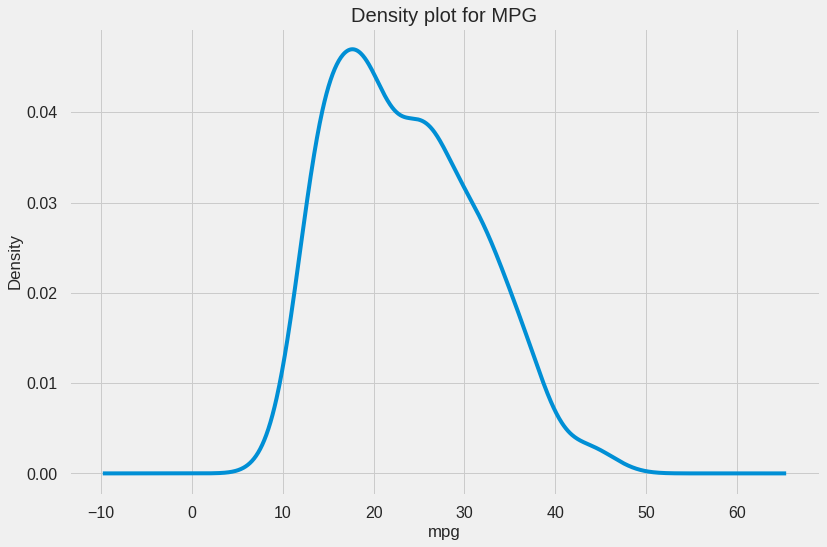

In [36]:
car_data['mpg'].plot.kde(figsize=(12,8))
plt.xlabel('mpg')
plt.title('Density plot for MPG')
plt.show()

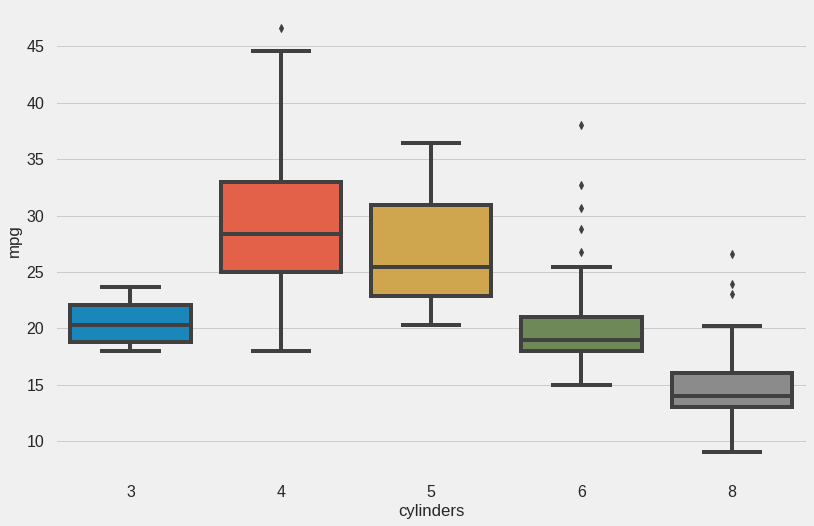

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x='cylinders', y='mpg', data=car_data)
plt.show()

# Cars with 4 cylinders are more likely to have more MPG

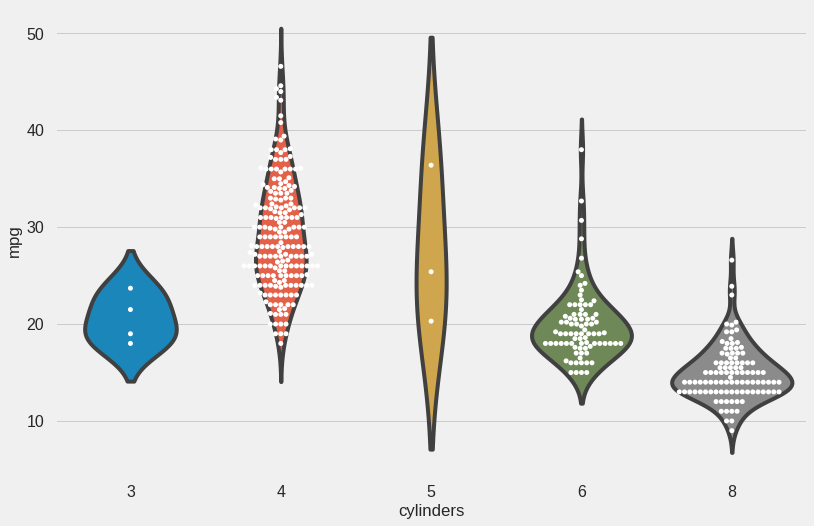

In [39]:
plt.figure(figsize=(12,8))
sns.violinplot(x='cylinders', y='mpg', data=car_data, inner=None)
sns.swarmplot(x='cylinders', y='mpg', data=car_data, color='w')
plt.show()

# our data contains samples with 4 cylinders more than cars with 6

In [9]:
cylinder_stats = car_data.groupby(['cylinders'])['mpg'].agg(['mean', 'count', 'std'])
cylinder_stats

,mean,count,std
cylinders,,,
3,20.550000,4,2.564501
4,29.283920,199,5.670546
5,27.366667,3,8.228204
6,19.973494,83,3.828809
8,14.963107,103,2.836284


In [10]:
ci95_high = []
ci95_low = []
for i in cylinder_stats.index:
    mean, count, std = cylinder_stats.loc[i]
    
    ci95_high.append(mean + 1.96 * (std / np.sqrt(count)))
    ci95_low.append(mean - 1.96 * (std / np.sqrt(count)))

In [11]:
cylinder_stats['ci95_H'] = ci95_high
cylinder_stats['ci95_L'] = ci95_low
cylinder_stats

,mean,count,std,ci95_H,ci95_L
cylinders,,,,,
3,20.550000,4,2.564501,23.063211,18.036789
4,29.283920,199,5.670546,30.071789,28.496050
5,27.366667,3,8.228204,36.677755,18.055578
6,19.973494,83,3.828809,20.797216,19.149772
8,14.963107,103,2.836284,15.510863,14.415351


In [12]:
cylinder_no = 4
car_w4_cylinder = car_data[car_data.cylinders == cylinder_no]
car_w4_cylinder.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
374,36.0,4,120.0,88,2160,14.5,39
350,33.7,4,107.0,75,2210,14.4,40
370,37.0,4,91.0,68,2025,18.2,39
194,24.5,4,98.0,60,2164,22.1,45
80,28.0,4,97.0,92,2288,17.0,49


/home/amiresm/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/amiresm/.local/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


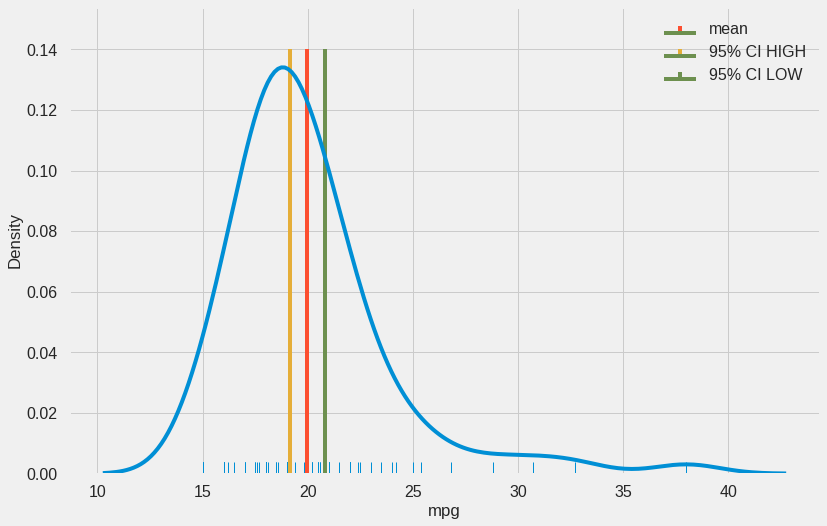

In [43]:
plt.figure(figsize=(12,8))
sns.distplot(car_w4_cylinder['mpg'], rug=True, kde=True, hist=False)

plt.stem([cylinder_stats.loc[cylinder_no]['mean']],
        [0.14], linefmt='C1', markerfmt='C1', label='mean')

plt.stem([cylinder_stats.loc[cylinder_no]['ci95_L']],
        [0.14], linefmt='C2', markerfmt='C2', label='95% CI HIGH')

plt.stem([cylinder_stats.loc[cylinder_no]['ci95_H']],
        [0.14], linefmt='C3', markerfmt='C3', label='95% CI LOW')


plt.xlabel('mpg')
plt.legend()
plt.show()

In [20]:
cylinder_no = 6
car_w4_cylinder = car_data[car_data.cylinders == cylinder_no]
car_w4_cylinder.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
44,18.0,6,258.0,110,2962,13.5,50
132,16.0,6,258.0,110,3632,18.0,47
226,18.5,6,250.0,98,3525,19.0,44
34,17.0,6,250.0,100,3329,15.5,50
356,25.4,6,168.0,116,2900,12.6,40


/home/amiresm/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/amiresm/.local/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


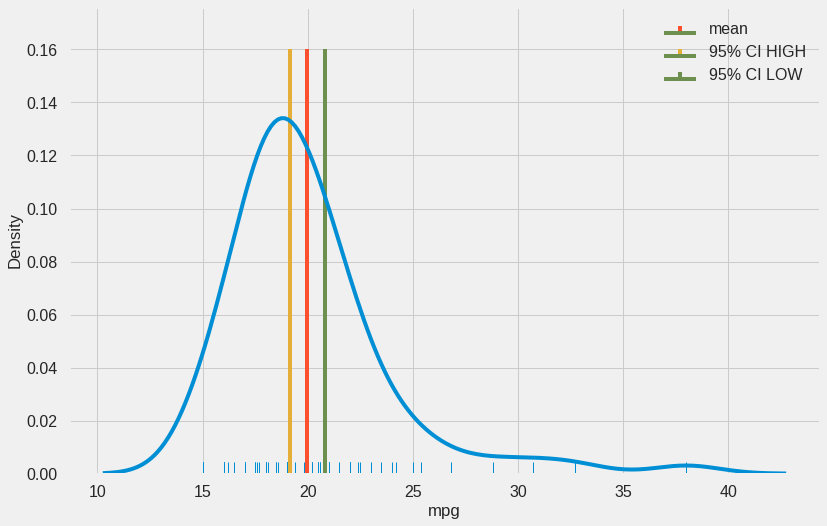

In [42]:
plt.figure(figsize=(12,8))
sns.distplot(car_w4_cylinder['mpg'], rug=True, kde=True, hist=False)

plt.stem([cylinder_stats.loc[cylinder_no]['mean']],
        [0.16], linefmt='C1', markerfmt='C1', label='mean')

plt.stem([cylinder_stats.loc[cylinder_no]['ci95_L']],
        [0.16], linefmt='C2', markerfmt='C2', label='95% CI HIGH')

plt.stem([cylinder_stats.loc[cylinder_no]['ci95_H']],
        [0.16], linefmt='C3', markerfmt='C3', label='95% CI LOW')


plt.xlabel('mpg')
plt.legend()
plt.show()